# Vyhodnotenie

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import openpyxl
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, auc, roc_curve
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt

In [3]:
def predict(X, treshold):
    y_pred = []
    for record in X:
        if record >= treshold:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    return y_pred

In [4]:
def find_best_treshold(X, y_true, tresholds):
    best_treshold = -1
    best_score = 0
    
    for treshold in tresholds:
        y_pred = predict(X, treshold)
        
        score = f1_score(y_true, y_pred)
        if(score > best_score):
            best_treshold = treshold
            best_score = score
            
    return best_treshold, best_score

In [5]:
def print_scores(y_true, y_pred):    
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true, y_pred))
    print("Recall: ", recall_score(y_true, y_pred))

In [6]:
def plot_roc_curve(fpr, tpr, roc_auc, algorithm_name):
    plt.title('Receiver Operating Characteristic - ' + algorithm_name)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [7]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 1000000)

In [8]:
results_inform = pd.read_excel("../data/results/hrd_results_inform.xlsx", index_col=0) 

results_inform

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines
0,P01/P1.I042.001.WGS_events.txt,NaN,NaN,1.007272,0,0,31,25,21,18,16,13,11,9,4,4,9,11,13,16,18,21,25,31,NaN,unknown,negative
1,P01/P1.I062.003.WGS_events.txt,NaN,NaN,1.029418,0,0,36,26,24,21,19,11,9,7,6,6,7,9,11,19,21,24,26,36,NaN,unknown,negative
2,P02/P2.MS.00F.WGS_events.txt,P02/P02.MS_00F.WGS.Source.vcf.gz,MS_00F.T,1.052231,0,0,127,101,77,59,44,35,29,23,16,16,23,29,35,44,59,77,101,127,17.0,unknown,negative
3,P03/P3.I062.007.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met4,1.022245,0,0,33,20,14,13,12,9,7,7,4,4,7,7,9,12,13,14,20,33,18.0,deceased,negative
4,P03/P3.I062.015.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met5,1.046050,0,0,89,69,59,45,40,31,27,24,20,20,24,27,31,40,45,59,69,89,19.0,deceased,negative
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013335,0,0,180,138,106,90,75,62,46,37,31,31,37,46,62,75,90,106,138,180,19.0,deceased,negative
6,P03/P3.I062.033.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met7,1.048037,1,1,96,69,52,46,31,26,22,22,20,22,24,24,28,33,48,54,71,98,20.0,deceased,negative
7,P04/P4.I042.002.WGS_events.txt,P04/P04.I042_002.WGS.Source.vcf.gz,I042_002.T,1.060387,0,0,23,14,13,11,11,8,7,7,7,7,7,7,8,11,11,13,14,23,2.0,unknown,negative
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.059753,0,0,175,113,77,62,51,43,30,22,22,22,22,30,43,51,62,77,113,175,NaN,deceased,positive
9,P06/P6.HD.00J.WGS_events.txt,P06/P06.HD_00J.WGS.HF.Source.vcf.gz,HD_00J.T,1.124714,0,0,78,57,46,39,30,25,22,18,17,17,18,22,25,30,39,46,57,78,NaN,stable,negative


## Reálne výsledky

In [9]:
inform_known_response = results_inform.loc[results_inform['Response - real'] != 'unknown']

In [10]:
inform_stable = results_inform.loc[results_inform['Response - real'] == 'stable']
inform_deceased = results_inform.loc[results_inform['Response - real'] == 'deceased']

### Optimalizácia

In [11]:
inform_known_response.loc[inform_known_response['Response - real'] == 'deceased', 'Response - real numeric'] = 0
inform_known_response.loc[inform_known_response['Response - real'] == 'stable', 'Response - real numeric'] = 1

inform_known_response

/mnt/d/skola/Bakalarka/bp-env/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/mnt/d/skola/Bakalarka/bp-env/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - real numeric
3,P03/P3.I062.007.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met4,1.022245,0,0,33,20,14,13,12,9,7,7,4,4,7,7,9,12,13,14,20,33,18.0,deceased,negative,0.0
4,P03/P3.I062.015.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met5,1.046050,0,0,89,69,59,45,40,31,27,24,20,20,24,27,31,40,45,59,69,89,19.0,deceased,negative,0.0
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013335,0,0,180,138,106,90,75,62,46,37,31,31,37,46,62,75,90,106,138,180,19.0,deceased,negative,0.0
6,P03/P3.I062.033.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met7,1.048037,1,1,96,69,52,46,31,26,22,22,20,22,24,24,28,33,48,54,71,98,20.0,deceased,negative,0.0
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.059753,0,0,175,113,77,62,51,43,30,22,22,22,22,30,43,51,62,77,113,175,NaN,deceased,positive,0.0
9,P06/P6.HD.00J.WGS_events.txt,P06/P06.HD_00J.WGS.HF.Source.vcf.gz,HD_00J.T,1.124714,0,0,78,57,46,39,30,25,22,18,17,17,18,22,25,30,39,46,57,78,NaN,stable,negative,1.0
10,P07/P7.MS.00A.WGS_events.txt,P07/P07.MS_00A.WGS.Source.vcf.gz,MS_00A.T,0.966000,0,0,92,72,57,49,43,31,30,28,26,26,28,30,31,43,49,57,72,92,NaN,stable,negative,1.0
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134877,48,23,155,116,77,60,50,47,38,29,24,95,100,109,118,121,131,148,187,226,16.0,stable,positive,1.0
27,P24/P24.I062.035.WGS_events.txt,P24/P24.I062.035.WGS.Source.vcf.gz,I062_035_2M1_D1,1.000028,5,6,2,1,1,1,1,1,1,1,0,11,12,12,12,12,12,12,12,13,NaN,deceased,negative,0.0
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041258,11,10,146,93,54,38,26,23,15,10,8,29,31,36,44,47,59,75,114,167,14.0,stable,positive,1.0


In [12]:
y_true = inform_known_response['Response - real numeric'].tolist()

#### LST 10 Mb

##### Vyhodnotenie pre hraničné skóre podľa článku

In [13]:
LST_10_treshold = 11

In [14]:
data_LST_10 = inform_known_response['LST_10Mb'].tolist()

<AxesSubplot:>

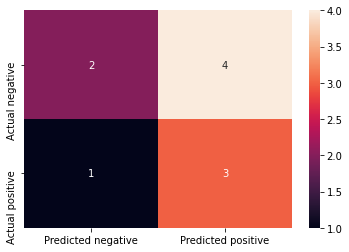

In [15]:
y_pred_LST_10 = predict(data_LST_10, LST_10_treshold)

cm = confusion_matrix(y_true, y_pred_LST_10)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [16]:
f1_score(y_true, y_pred_LST_10)

0.5454545454545454

##### Pokus o nájdenie najoptimálnejšieho LST_10Mb hraničného skóre

In [17]:
best_LST_10_treshold, best_LST_10_f1_score = find_best_treshold(data_LST_10, y_true, [x for x in range(10, 29)])

best_LST_10_treshold, best_LST_10_f1_score

(10, 0.6666666666666666)

<AxesSubplot:>

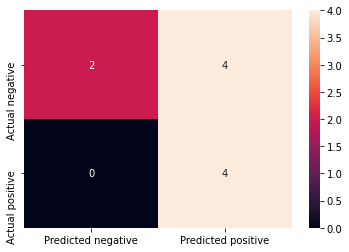

In [18]:
y_pred_LST_10_best = predict(data_LST_10, best_LST_10_treshold)

cm = confusion_matrix(y_true, y_pred_LST_10_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [19]:
print_scores(y_true, y_pred_LST_10_best)

Accuracy:  0.6
Precision:  0.5
Recall:  1.0


#### HRD s LST 10 Mb

##### Vyhodnotenie pre hraničné skóre podľa článku

In [20]:
HRD_10_treshold = 42

In [21]:
data_HRD_10 = inform_known_response['HRD_10'].tolist()

<AxesSubplot:>

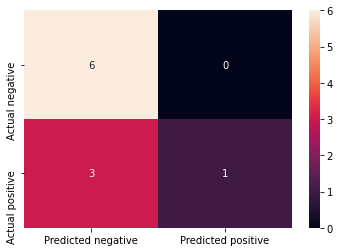

In [22]:
y_pred_HRD_10 = predict(data_HRD_10, HRD_10_treshold)

cm = confusion_matrix(y_true, y_pred_HRD_10)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [23]:
f1_score(y_true, y_pred_HRD_10)

0.4

Vzhľadom na to že hranica 42 je pri našich dátach pomerne vysoká, metóda pri tejto hranici nedokázala dobre zaklasifikovať tumory.

##### Pokus o nájdenie najoptimálnejšieho HRD_10 hraničného skóre

In [24]:
best_HRD_10_treshold, best_HRD_10_f1_score = find_best_treshold(data_HRD_10, y_true, [x for x in range(18, 56)])

best_HRD_10_treshold, best_HRD_10_f1_score

(25, 0.75)

<AxesSubplot:>

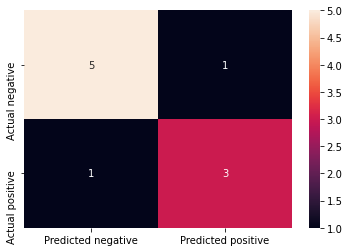

In [25]:
y_pred_HRD_10_best = predict(data_HRD_10, best_HRD_10_treshold)

cm = confusion_matrix(y_true, y_pred_HRD_10_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [26]:
print_scores(y_true, y_pred_HRD_10_best)

Accuracy:  0.8
Precision:  0.75
Recall:  0.75


Vyzerá, že HRD klasifikuje lepšie ako LST 10Mb.

Vzhľadom na celkovú distribúciu hodnôt metrík TAI a LOH nevyzerá, že by mohli byť úspešné ako samostatné metódy. Napriek tomu podobne ako pri predošlých algoritmoch skúsime vyhodnotiť a optimalizovať klasifikáciu pomocou týchto metód. 

##### LOH

In [27]:
data_LOH = inform_known_response['LOH'].tolist()

In [28]:
best_LOH_treshold, best_LOH_f1_score = find_best_treshold(data_LOH, y_true, [x for x in range(0, 21)])

best_LOH_treshold, best_LOH_f1_score

(7, 0.6666666666666666)

<AxesSubplot:>

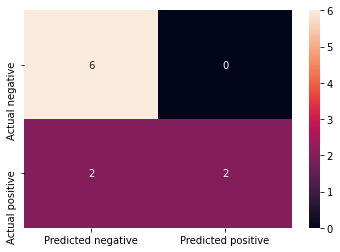

In [29]:
y_pred_LOH_best = predict(data_LOH, best_LOH_treshold)

cm = confusion_matrix(y_true, y_pred_LOH_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [30]:
print_scores(y_true, y_pred_LOH_best)

Accuracy:  0.8
Precision:  1.0
Recall:  0.5


##### TAI

In [31]:
data_TAI = inform_known_response['TAI'].tolist()

In [32]:
best_TAI_treshold, best_TAI_f1_score = find_best_treshold(data_TAI, y_true, [x for x in range(0, 21)])

best_TAI_treshold, best_TAI_f1_score

(6, 0.6666666666666666)

<AxesSubplot:>

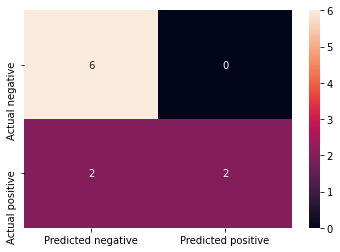

In [33]:
y_pred_TAI_best = predict(data_TAI, best_TAI_treshold)

cm = confusion_matrix(y_true, y_pred_TAI_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [34]:
print_scores(y_true, y_pred_TAI_best)

Accuracy:  0.8
Precision:  1.0
Recall:  0.5


## Výsledky z bunkových línií

In [35]:
inform_known_cl_response = results_inform.loc[results_inform['Response - cell lines'] != 'unknown']

### Optimalizácia

Prevedieme textové označkovania na číselné hodnoty.

In [36]:
inform_known_cl_response.loc[inform_known_cl_response['Response - cell lines'] == 'negative', 'Response - cell lines numeric'] = 0
inform_known_cl_response.loc[inform_known_cl_response['Response - cell lines'] == 'positive', 'Response - cell lines numeric'] = 1

inform_known_cl_response

/mnt/d/skola/Bakalarka/bp-env/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/mnt/d/skola/Bakalarka/bp-env/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric
0,P01/P1.I042.001.WGS_events.txt,NaN,NaN,1.007272,0,0,31,25,21,18,16,13,11,9,4,4,9,11,13,16,18,21,25,31,NaN,unknown,negative,0.0
1,P01/P1.I062.003.WGS_events.txt,NaN,NaN,1.029418,0,0,36,26,24,21,19,11,9,7,6,6,7,9,11,19,21,24,26,36,NaN,unknown,negative,0.0
2,P02/P2.MS.00F.WGS_events.txt,P02/P02.MS_00F.WGS.Source.vcf.gz,MS_00F.T,1.052231,0,0,127,101,77,59,44,35,29,23,16,16,23,29,35,44,59,77,101,127,17.0,unknown,negative,0.0
3,P03/P3.I062.007.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met4,1.022245,0,0,33,20,14,13,12,9,7,7,4,4,7,7,9,12,13,14,20,33,18.0,deceased,negative,0.0
4,P03/P3.I062.015.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met5,1.046050,0,0,89,69,59,45,40,31,27,24,20,20,24,27,31,40,45,59,69,89,19.0,deceased,negative,0.0
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013335,0,0,180,138,106,90,75,62,46,37,31,31,37,46,62,75,90,106,138,180,19.0,deceased,negative,0.0
6,P03/P3.I062.033.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met7,1.048037,1,1,96,69,52,46,31,26,22,22,20,22,24,24,28,33,48,54,71,98,20.0,deceased,negative,0.0
7,P04/P4.I042.002.WGS_events.txt,P04/P04.I042_002.WGS.Source.vcf.gz,I042_002.T,1.060387,0,0,23,14,13,11,11,8,7,7,7,7,7,7,8,11,11,13,14,23,2.0,unknown,negative,0.0
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.059753,0,0,175,113,77,62,51,43,30,22,22,22,22,30,43,51,62,77,113,175,NaN,deceased,positive,1.0
9,P06/P6.HD.00J.WGS_events.txt,P06/P06.HD_00J.WGS.HF.Source.vcf.gz,HD_00J.T,1.124714,0,0,78,57,46,39,30,25,22,18,17,17,18,22,25,30,39,46,57,78,NaN,stable,negative,0.0


Načítame si do premennej hodnoty cieľového atribútu

In [37]:
y_true_cl = inform_known_cl_response['Response - cell lines numeric'].tolist()

#### LST 11 Mb

In [38]:
data_LST_11 = inform_known_cl_response['LST_11Mb'].tolist()

In [39]:
best_LST_11_treshold, best_LST_11_f1_score = find_best_treshold(data_LST_11, y_true_cl, [x for x in range(8, 29)])

best_LST_11_treshold, best_LST_11_f1_score

(22, 0.6153846153846154)

<AxesSubplot:>

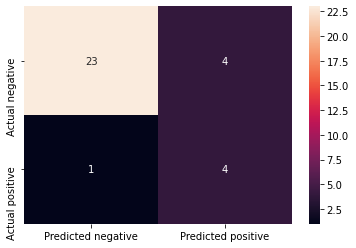

In [40]:
y_pred_LST_11_best = predict(data_LST_11, best_LST_11_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LST_11_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [41]:
print_scores(y_true_cl, y_pred_LST_11_best)

Accuracy:  0.84375
Precision:  0.5
Recall:  0.8


#### LST 10 Mb

##### Vyhodnotenie pre hraničné skóre podľa článku

Vyskúšame ako bude algoritmus klasifikovať nádory pri použití hraničné skóre z analyzovaného odborného článku. Tento experiment urobíme aj pre hodnoty parametra 6, 7, 8, 9 Mb a tiež pri kombinovanom skóre s použitím hodnoty LST_SMb 10 Mb. 

In [42]:
LST_10_treshold = 11

In [43]:
data_LST_10 = inform_known_cl_response['LST_10Mb'].tolist()

<AxesSubplot:>

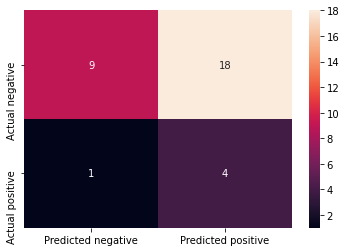

In [44]:
y_pred_LST_10 = predict(data_LST_10, LST_10_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LST_10)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [45]:
f1_score(y_true_cl, y_pred_LST_10)

0.2962962962962963

Dosiahnuté F1 skóre je veľmi nízke. Algoritmus pri tomto hraničnom skóre síce vcelku dobre klasifikuje pozitívne vzorky, avšak môžeme tiež pozorovať vysokú mieru falošnej pozitivity

##### Pokus o nájdenie najoptimálnejšieho LST_10Mb hraničného skóre

In [46]:
best_LST_10_treshold, best_LST_10_f1_score = find_best_treshold(data_LST_10, y_true_cl, [x for x in range(10, 35)])

best_LST_10_treshold, best_LST_10_f1_score

(29, 0.6666666666666665)

<AxesSubplot:>

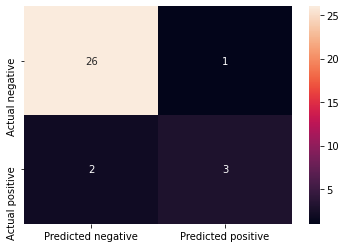

In [47]:
y_pred_LST_10_best = predict(data_LST_10, best_LST_10_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LST_10_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [48]:
print_scores(y_true_cl, y_pred_LST_10_best)

Accuracy:  0.90625
Precision:  0.75
Recall:  0.6


Pri vyššej hodnote hraničného skóre sa podarilo pomerne dobre zaklasifikovať pozitívne aj negatívne vzorky. Skóre uvedené v článku bolo v našom prípade veľmi nízke. To isté sa potvrdilo aj v ostatných prípadoch pri LST.

#### LST 9 Mb

In [49]:
data_LST_9 = inform_known_cl_response['LST_9Mb'].tolist()

##### Vyhodnotenie pre hraničné skóre podľa článku

In [50]:
LST_9_treshold = 14

<AxesSubplot:>

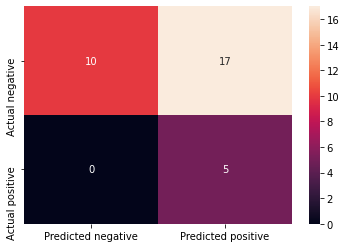

In [51]:
y_pred_LST_9 = predict(data_LST_9, LST_9_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LST_9)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [52]:
f1_score(y_true_cl, y_pred_LST_9)

0.37037037037037035

##### Pokus o nájdenie najoptimálnejšieho LST_9Mb hraničného skóre

In [53]:
best_LST_9_treshold, best_LST_9_f1_score = find_best_treshold(data_LST_9, y_true_cl, [x for x in range(15, 40)])

best_LST_9_treshold, best_LST_9_f1_score

(33, 0.6666666666666665)

<AxesSubplot:>

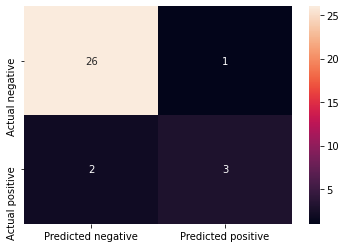

In [54]:
y_pred_LST_9_best = predict(data_LST_9, best_LST_9_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LST_9_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [55]:
print_scores(y_true_cl, y_pred_LST_9_best)

Accuracy:  0.90625
Precision:  0.75
Recall:  0.6


#### LST 8 Mb

In [56]:
data_LST_8 = inform_known_cl_response['LST_8Mb'].tolist()

##### Vyhodnotenie pre hraničné skóre podľa článku

In [57]:
LST_8_treshold = 14

<AxesSubplot:>

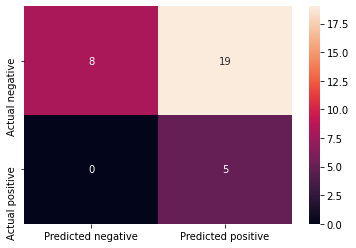

In [58]:
y_pred_LST_8 = predict(data_LST_8, LST_8_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LST_8)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [59]:
f1_score(y_true_cl, y_pred_LST_8)

0.3448275862068966

##### Pokus o nájdenie najoptimálnejšieho LST_8Mb hraničného skóre

In [60]:
best_LST_8_treshold, best_LST_8_f1_score = find_best_treshold(data_LST_8, y_true_cl, [x for x in range(23, 47)])

best_LST_8_treshold, best_LST_8_f1_score

(37, 0.8000000000000002)

<AxesSubplot:>

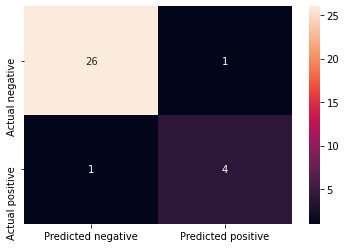

In [61]:
y_pred_LST_8_best = predict(data_LST_8, best_LST_8_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LST_8_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [62]:
print_scores(y_true_cl, y_pred_LST_8_best)

Accuracy:  0.9375
Precision:  0.8
Recall:  0.8


#### LST 7 Mb

In [63]:
data_LST_7 = inform_known_cl_response['LST_7Mb'].tolist()

##### Vyhodnotenie pre hraničné skóre podľa článku

In [64]:
LST_7_treshold = 17

<AxesSubplot:>

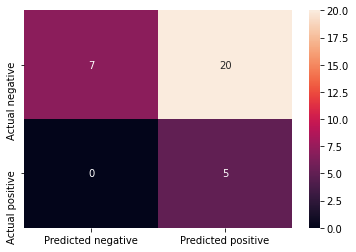

In [65]:
y_pred_LST_7 = predict(data_LST_7, LST_7_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LST_7)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [66]:
f1_score(y_true_cl, y_pred_LST_7)

0.33333333333333337

##### Pokus o nájdenie najoptimálnejšieho LST_7Mb hraničného skóre

In [67]:
best_LST_7_treshold, best_LST_7_f1_score = find_best_treshold(data_LST_7, y_true_cl, [x for x in range(26, 51)])

best_LST_7_treshold, best_LST_7_f1_score

(46, 0.6666666666666665)

<AxesSubplot:>

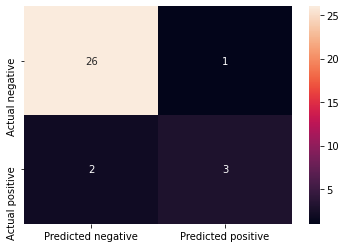

In [68]:
y_pred_LST_7_best = predict(data_LST_7, best_LST_7_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LST_7_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [69]:
print_scores(y_true_cl, y_pred_LST_7_best)

Accuracy:  0.90625
Precision:  0.75
Recall:  0.6


#### LST 6 Mb

In [70]:
data_LST_6 = inform_known_cl_response['LST_6Mb'].tolist()

##### Vyhodnotenie pre hraničné skóre podľa článku

In [71]:
LST_6_treshold = 19

<AxesSubplot:>

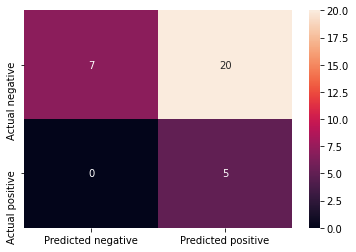

In [72]:
y_pred_LST_6 = predict(data_LST_6, LST_6_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LST_6)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [73]:
f1_score(y_true_cl, y_pred_LST_6)

0.33333333333333337

Vidíme, že hraničné skóre uvedené v článku je v našom prípade veľmi nízke. Pozitívnych pacientov síce dokáže zaklasifikovať presne avšak miera falošnej pozitivity je veľmi vysoká.

##### Pokus o nájdenie najoptimálnejšieho LST_6Mb hraničného skóre

In [74]:
best_LST_6_treshold, best_LST_6_f1_score = find_best_treshold(data_LST_6, y_true_cl, [x for x in range(38, 62)])

best_LST_6_treshold, best_LST_6_f1_score

(60, 0.6666666666666665)

<AxesSubplot:>

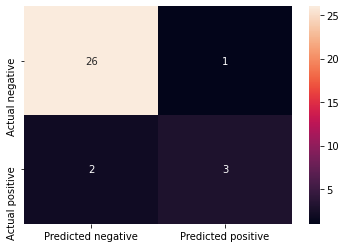

In [75]:
y_pred_LST_6_best = predict(data_LST_6, best_LST_6_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LST_6_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [76]:
print_scores(y_true_cl, y_pred_LST_6_best)

Accuracy:  0.90625
Precision:  0.75
Recall:  0.6


#### LST 5 Mb

In [77]:
data_LST_5 = inform_known_cl_response['LST_5Mb'].tolist()

In [78]:
best_LST_5_treshold, best_LST_5_f1_score = find_best_treshold(data_LST_5, y_true_cl, [x for x in range(54, 87)])

best_LST_5_treshold, best_LST_5_f1_score

(54, 0.5555555555555556)

<AxesSubplot:>

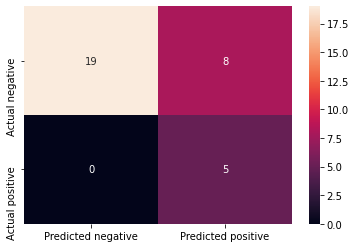

In [79]:
y_pred_LST_5_best = predict(data_LST_5, best_LST_5_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LST_5_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [80]:
print_scores(y_true_cl, y_pred_LST_5_best)

Accuracy:  0.75
Precision:  0.38461538461538464
Recall:  1.0


#### LST 4 Mb

In [81]:
data_LST_4 = inform_known_cl_response['LST_4Mb'].tolist()

In [82]:
best_LST_4_treshold, best_LST_4_f1_score = find_best_treshold(data_LST_4, y_true_cl, [x for x in range(72, 116)])

best_LST_4_treshold, best_LST_4_f1_score

(90, 0.6666666666666666)

<AxesSubplot:>

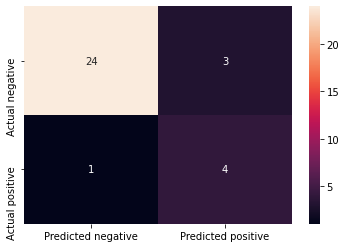

In [83]:
y_pred_LST_4_best = predict(data_LST_4, best_LST_4_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LST_4_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [84]:
print_scores(y_true_cl, y_pred_LST_4_best)

Accuracy:  0.875
Precision:  0.5714285714285714
Recall:  0.8


#### LST 3 Mb

In [85]:
data_LST_3 = inform_known_cl_response['LST_3Mb'].tolist()

In [86]:
best_LST_3_treshold, best_LST_3_f1_score = find_best_treshold(data_LST_3, y_true_cl, [x for x in range(85, 175)])

best_LST_3_treshold, best_LST_3_f1_score

(128, 0.7272727272727272)

<AxesSubplot:>

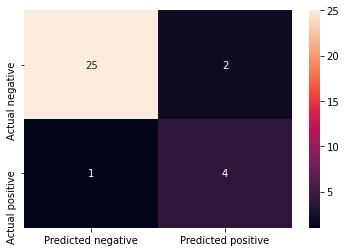

In [87]:
y_pred_LST_3_best = predict(data_LST_3, best_LST_3_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LST_3_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [88]:
print_scores(y_true_cl, y_pred_LST_3_best)

Accuracy:  0.90625
Precision:  0.6666666666666666
Recall:  0.8


Najvyššie F1 skóre bolo dosiahnuté pri hodnote parametra 8 Mb, najnižšie pri hodnote 5 Mb.

#### HRD s LST 11 Mb

In [89]:
data_HRD_11 = inform_known_cl_response['HRD_11'].tolist()

In [90]:
best_HRD_11_treshold, best_HRD_11_f1_score = find_best_treshold(data_HRD_11, y_true_cl, [x for x in range(22, 40)])

best_HRD_11_treshold, best_HRD_11_f1_score

(27, 0.7272727272727272)

<AxesSubplot:>

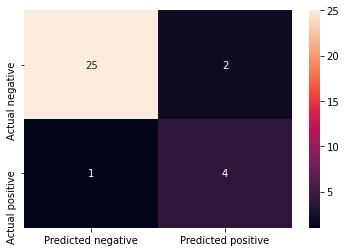

In [91]:
y_pred_HRD_11_best = predict(data_HRD_11, best_HRD_11_treshold)

cm = confusion_matrix(y_true_cl, y_pred_HRD_11_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [92]:
print_scores(y_true_cl, y_pred_HRD_11_best)

Accuracy:  0.90625
Precision:  0.6666666666666666
Recall:  0.8


#### HRD s LST 10 Mb

##### Vyhodnotenie pre hraničné skóre podľa článku

In [93]:
HRD_10_treshold = 42

In [94]:
data_HRD_10 = inform_known_cl_response['HRD_10'].tolist()

<AxesSubplot:>

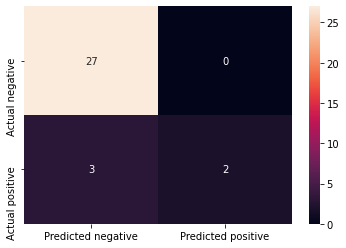

In [95]:
y_pred_HRD_10 = predict(data_HRD_10, HRD_10_treshold)

cm = confusion_matrix(y_true_cl, y_pred_HRD_10)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [96]:
f1_score(y_true_cl, y_pred_HRD_10)

0.5714285714285715

Tentokrát sa hranica z článku ukázala byť príliš vysoká. Negatívne tumory sa síce podarili zaklasifikovať presne avšak z pozitívnych tumorov sa podarilo zaklasifikovať správne iba dva.

##### Pokus o nájdenie najoptimálnejšieho HRD_10 hraničného skóre

In [97]:
best_HRD_10_treshold, best_HRD_10_f1_score = find_best_treshold(data_HRD_10, y_true_cl, [x for x in range(22, 45)])

best_HRD_10_treshold, best_HRD_10_f1_score

(30, 0.7272727272727272)

<AxesSubplot:>

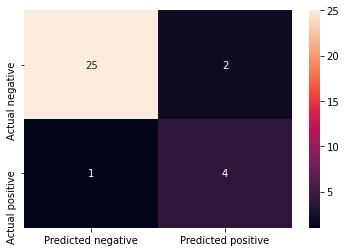

In [98]:
y_pred_HRD_10_best = predict(data_HRD_10, best_HRD_10_treshold)

cm = confusion_matrix(y_true_cl, y_pred_HRD_10_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [99]:
print_scores(y_true_cl, y_pred_HRD_10_best)

Accuracy:  0.90625
Precision:  0.6666666666666666
Recall:  0.8


#### HRD s LST 9 Mb

In [100]:
data_HRD_9 = inform_known_cl_response['HRD_9'].tolist()

In [101]:
best_HRD_9_treshold, best_HRD_9_f1_score = find_best_treshold(data_HRD_9, y_true_cl, [x for x in range(30, 50)])

best_HRD_9_treshold, best_HRD_9_f1_score

(34, 0.7272727272727272)

<AxesSubplot:>

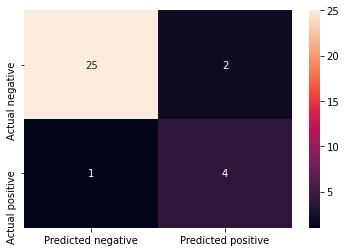

In [102]:
y_pred_HRD_9_best = predict(data_HRD_9, best_HRD_9_treshold)

cm = confusion_matrix(y_true_cl, y_pred_HRD_9_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [103]:
print_scores(y_true_cl, y_pred_HRD_9_best)

Accuracy:  0.90625
Precision:  0.6666666666666666
Recall:  0.8


#### HRD s LST 8 Mb

In [104]:
data_HRD_8 = inform_known_cl_response['HRD_8'].tolist()

In [105]:
best_HRD_8_treshold, best_HRD_8_f1_score = find_best_treshold(data_HRD_8, y_true_cl, [x for x in range(40, 65)])

best_HRD_8_treshold, best_HRD_8_f1_score

(43, 0.9090909090909091)

<AxesSubplot:>

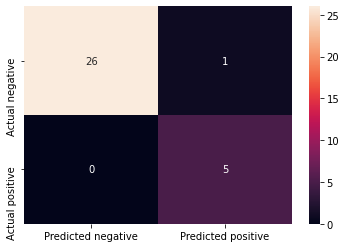

In [106]:
y_pred_HRD_8_best = predict(data_HRD_8, best_HRD_8_treshold)

cm = confusion_matrix(y_true_cl, y_pred_HRD_8_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [107]:
print_scores(y_true_cl, y_pred_HRD_8_best)

Accuracy:  0.96875
Precision:  0.8333333333333334
Recall:  1.0


#### HRD s LST 7 Mb

In [108]:
data_HRD_7 = inform_known_cl_response['HRD_7'].tolist()

In [109]:
best_HRD_7_treshold, best_HRD_7_f1_score = find_best_treshold(data_HRD_7, y_true_cl, [x for x in range(45, 80)])

best_HRD_7_treshold, best_HRD_7_f1_score

(45, 0.8333333333333333)

<AxesSubplot:>

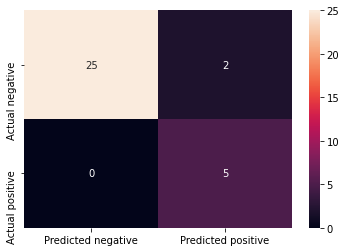

In [110]:
y_pred_HRD_7_best = predict(data_HRD_7, best_HRD_7_treshold)

cm = confusion_matrix(y_true_cl, y_pred_HRD_7_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [111]:
print_scores(y_true_cl, y_pred_HRD_7_best)

Accuracy:  0.9375
Precision:  0.7142857142857143
Recall:  1.0


#### HRD s LST 6 Mb

In [112]:
data_HRD_6 = inform_known_cl_response['HRD_6'].tolist()

In [113]:
best_HRD_6_treshold, best_HRD_6_f1_score = find_best_treshold(data_HRD_6, y_true_cl, [x for x in range(55, 95)])

best_HRD_6_treshold, best_HRD_6_f1_score

(55, 0.8333333333333333)

<AxesSubplot:>

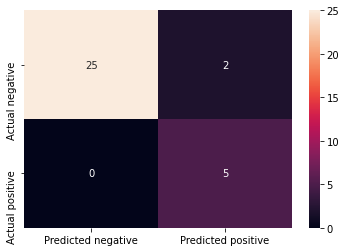

In [114]:
y_pred_HRD_6_best = predict(data_HRD_6, best_HRD_6_treshold)

cm = confusion_matrix(y_true_cl, y_pred_HRD_6_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [115]:
print_scores(y_true_cl, y_pred_HRD_6_best)

Accuracy:  0.9375
Precision:  0.7142857142857143
Recall:  1.0


#### HRD s LST 5 Mb

In [116]:
data_HRD_5 = inform_known_cl_response['HRD_5'].tolist()

In [117]:
best_HRD_5_treshold, best_HRD_5_f1_score = find_best_treshold(data_HRD_5, y_true_cl, [x for x in range(65, 110)])

best_HRD_5_treshold, best_HRD_5_f1_score

(67, 0.7692307692307693)

<AxesSubplot:>

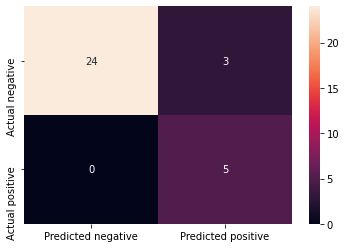

In [118]:
y_pred_HRD_5_best = predict(data_HRD_5, best_HRD_5_treshold)

cm = confusion_matrix(y_true_cl, y_pred_HRD_5_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [119]:
print_scores(y_true_cl, y_pred_HRD_5_best)

Accuracy:  0.90625
Precision:  0.625
Recall:  1.0


#### HRD s LST 4 Mb

In [120]:
data_HRD_4 = inform_known_cl_response['HRD_4'].tolist()

In [121]:
best_HRD_4_treshold, best_HRD_4_f1_score = find_best_treshold(data_HRD_4, y_true_cl, [x for x in range(80, 140)])

best_HRD_4_treshold, best_HRD_4_f1_score

(102, 0.7272727272727272)

<AxesSubplot:>

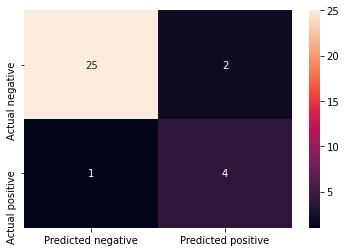

In [122]:
y_pred_HRD_4_best = predict(data_HRD_4, best_HRD_4_treshold)

cm = confusion_matrix(y_true_cl, y_pred_HRD_4_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [123]:
print_scores(y_true_cl, y_pred_HRD_4_best)

Accuracy:  0.90625
Precision:  0.6666666666666666
Recall:  0.8


#### HRD s LST 3 Mb

In [124]:
data_HRD_3 = inform_known_cl_response['HRD_3'].tolist()

In [125]:
best_HRD_3_treshold, best_HRD_3_f1_score = find_best_treshold(data_HRD_3, y_true_cl, [x for x in range(95, 190)])

best_HRD_3_treshold, best_HRD_3_f1_score

(128, 0.7272727272727272)

<AxesSubplot:>

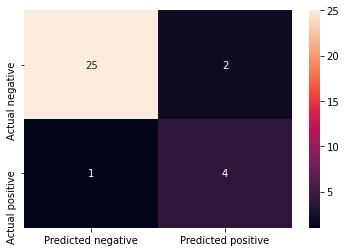

In [126]:
y_pred_HRD_3_best = predict(data_HRD_3, best_HRD_3_treshold)

cm = confusion_matrix(y_true_cl, y_pred_HRD_3_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [127]:
print_scores(y_true_cl, y_pred_HRD_3_best)

Accuracy:  0.90625
Precision:  0.6666666666666666
Recall:  0.8


Vyzerá, že kombinované skóre dosahuje lepšie výsledky ako LST. Najvyššie F1 skóre bolo dosiahnuté pri hodnote LST_SMb 8 Mb, veľmi dobré výsledky dosiahli aj hodnoty 6 a 7 Mb. Ostatné hodnoty dosiahli ale tiež uspokojivé aj keď o niečo slabšie výsledky. 

#### LOH

In [128]:
data_LOH = inform_known_cl_response['LOH'].tolist()

In [129]:
best_LOH_treshold, best_LOH_f1_score = find_best_treshold(data_LOH, y_true_cl, [x for x in range(0, 15)])

best_LOH_treshold, best_LOH_f1_score

(9, 0.5714285714285715)

<AxesSubplot:>

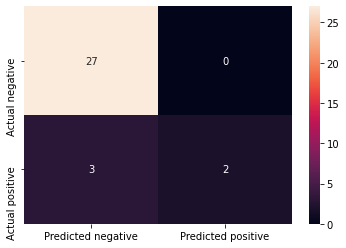

In [130]:
y_pred_LOH_best = predict(data_LOH, best_LOH_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LOH_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [131]:
print_scores(y_true_cl, y_pred_LOH_best)

Accuracy:  0.90625
Precision:  1.0
Recall:  0.4


#### TAI

In [132]:
data_TAI = inform_known_cl_response['TAI'].tolist()

In [133]:
best_TAI_treshold, best_TAI_f1_score = find_best_treshold(data_TAI, y_true_cl, [x for x in range(0, 15)])

best_TAI_treshold, best_TAI_f1_score

(9, 0.5714285714285715)

<AxesSubplot:>

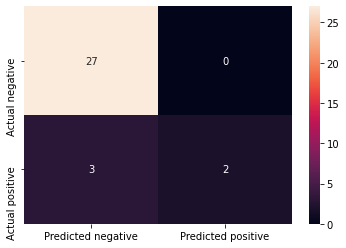

In [134]:
y_pred_TAI_best = predict(data_TAI, best_TAI_treshold)

cm = confusion_matrix(y_true_cl, y_pred_TAI_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [135]:
print_scores(y_true_cl, y_pred_TAI_best)

Accuracy:  0.90625
Precision:  1.0
Recall:  0.4


Vyzerá, že TAI a LOH sú najslabšie klasifikátory pri samostatnom použití. Obidve metódy síce dokázali identifikovať všetky negatívne vzorky ale podarilo sa im zachytiť iba po dva pozitívne prípady.

### ROC analýza

#### LST 11 Mb

Pri každom algoritme musíme najprv preškálovať výstupné hodnoty do intervalu 0..1.

In [136]:
data_LST_11_scaled = minmax_scale(data_LST_11)

In [137]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_LST_11_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.8

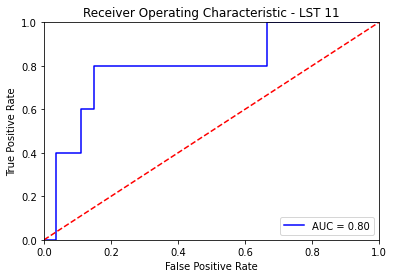

In [138]:
plot_roc_curve(fpr, tpr, roc_auc, 'LST 11')

#### LST 10 Mb

In [139]:
data_LST_10_scaled = minmax_scale(data_LST_10)

In [140]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_LST_10_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.774074074074074

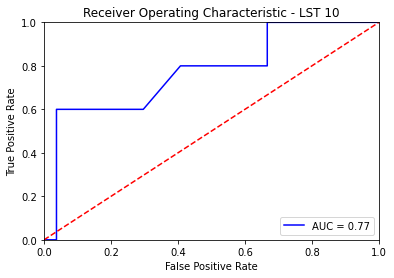

In [141]:
plot_roc_curve(fpr, tpr, roc_auc, 'LST 10')

#### LST 9 Mb

In [142]:
data_LST_9_scaled = minmax_scale(data_LST_9)

In [143]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_LST_9_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.825925925925926

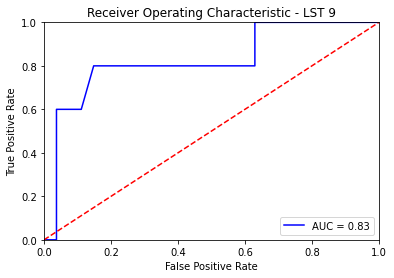

In [144]:
plot_roc_curve(fpr, tpr, roc_auc, 'LST 9')

#### LST 8 Mb

In [145]:
data_LST_8_scaled = minmax_scale(data_LST_8)

In [146]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_LST_8_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.8481481481481482

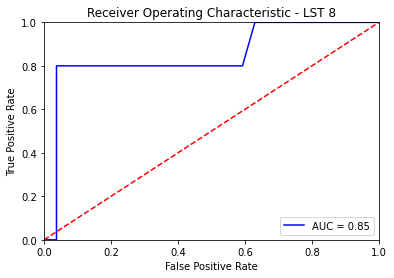

In [147]:
plot_roc_curve(fpr, tpr, roc_auc, 'LST 8')

#### LST 7 Mb

In [148]:
data_LST_7_scaled = minmax_scale(data_LST_7)

In [149]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_LST_7_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.8296296296296296

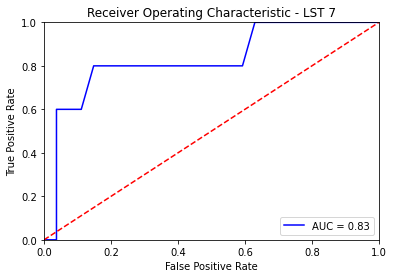

In [150]:
plot_roc_curve(fpr, tpr, roc_auc, 'LST 7')

#### LST 6 Mb

In [151]:
data_LST_6_scaled = minmax_scale(data_LST_6)

In [152]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_LST_6_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.8444444444444444

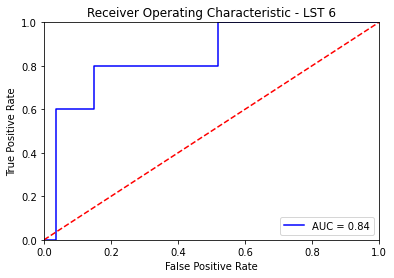

In [153]:
plot_roc_curve(fpr, tpr, roc_auc, 'LST 6')

#### LST 5 Mb

In [154]:
data_LST_5_scaled = minmax_scale(data_LST_5)

In [155]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_LST_5_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.8555555555555556

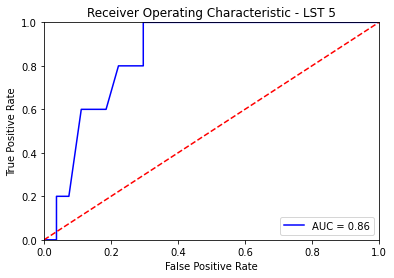

In [156]:
plot_roc_curve(fpr, tpr, roc_auc, 'LST 5')

#### LST 4 Mb

In [157]:
data_LST_4_scaled = minmax_scale(data_LST_4)

In [158]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_LST_4_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.8851851851851852

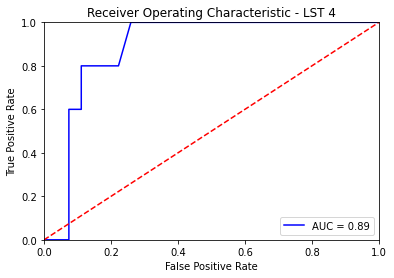

In [159]:
plot_roc_curve(fpr, tpr, roc_auc, 'LST 4')

#### LST 3 Mb

In [160]:
data_LST_3_scaled = minmax_scale(data_LST_3)

In [161]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_LST_3_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.8777777777777778

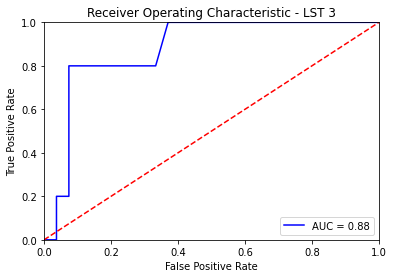

In [162]:
plot_roc_curve(fpr, tpr, roc_auc, 'LST 3')

Najvyššie AUC skóre bolo dosiahnuté pri hodnote parametra 4 Mb, najnižšie pri hodnote 10 Mb. 

#### HRD 11 Mb

In [163]:
data_HRD_11_scaled = minmax_scale(data_HRD_11)

In [164]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_HRD_11_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.9259259259259259

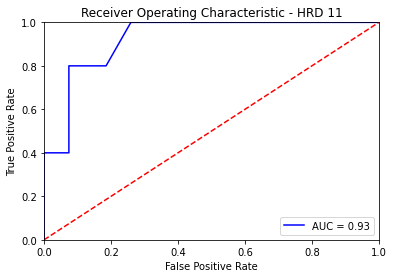

In [165]:
plot_roc_curve(fpr, tpr, roc_auc, 'HRD 11')

#### HRD 10 Mb

In [166]:
data_HRD_10_scaled = minmax_scale(data_HRD_10)

In [167]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_HRD_10_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.9

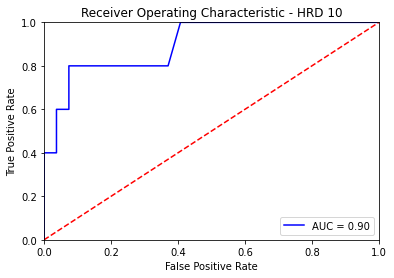

In [168]:
plot_roc_curve(fpr, tpr, roc_auc, 'HRD 10')

#### HRD 9 Mb

In [169]:
data_HRD_9_scaled = minmax_scale(data_HRD_9)

In [170]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_HRD_9_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.9407407407407408

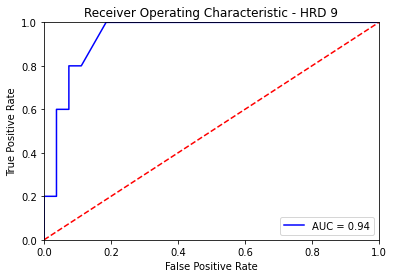

In [171]:
plot_roc_curve(fpr, tpr, roc_auc, 'HRD 9')

#### HRD 8 Mb

In [172]:
data_HRD_8_scaled = minmax_scale(data_HRD_8)

In [173]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_HRD_8_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.9703703703703703

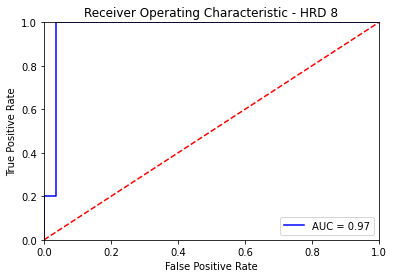

In [174]:
plot_roc_curve(fpr, tpr, roc_auc, 'HRD 8')

#### HRD 7 Mb

In [175]:
data_HRD_7_scaled = minmax_scale(data_HRD_7)

In [176]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_HRD_7_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.9666666666666667

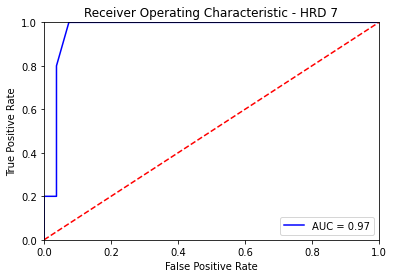

In [177]:
plot_roc_curve(fpr, tpr, roc_auc, 'HRD 7')

#### HRD 6 Mb

In [178]:
data_HRD_6_scaled = minmax_scale(data_HRD_6)

In [179]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_HRD_6_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.9666666666666667

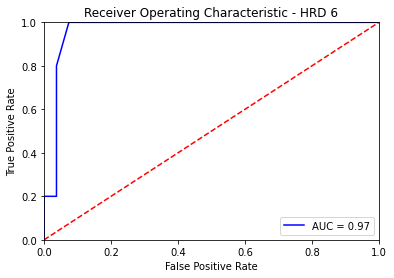

In [180]:
plot_roc_curve(fpr, tpr, roc_auc, 'HRD 6')

#### HRD 5 Mb

In [181]:
data_HRD_5_scaled = minmax_scale(data_HRD_5)

In [182]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_HRD_5_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.9296296296296296

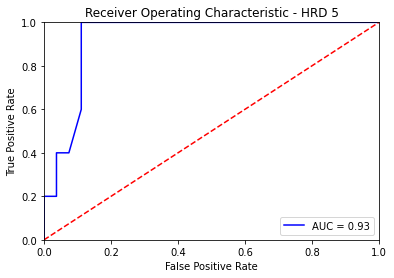

In [183]:
plot_roc_curve(fpr, tpr, roc_auc, 'HRD 5')

#### HRD 4 Mb

In [184]:
data_HRD_4_scaled = minmax_scale(data_HRD_4)

In [185]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_HRD_4_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.9185185185185185

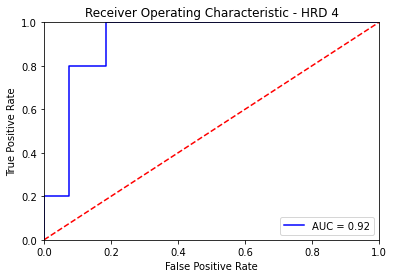

In [186]:
plot_roc_curve(fpr, tpr, roc_auc, 'HRD 4')

#### HRD 3 Mb

In [187]:
data_HRD_3_scaled = minmax_scale(data_HRD_3)

In [188]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_HRD_3_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.9148148148148147

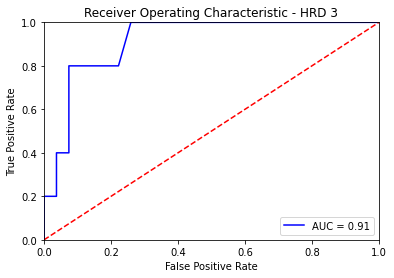

In [189]:
plot_roc_curve(fpr, tpr, roc_auc, 'HRD 3')

Aj pri ROC analýze sa javí byť kombinované skóre lepší klasifikátor ako samotné LST. Najvyššia hodnota AUC bola dosiahnutá pri hodnote parametra 8 Mb, zanedbateľne nižšie AUC  dosiahli hodnoty 6 a 7 Mb.

#### LOH

In [190]:
data_LOH_scaled = minmax_scale(data_LOH)

In [191]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_LOH_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.7037037037037038

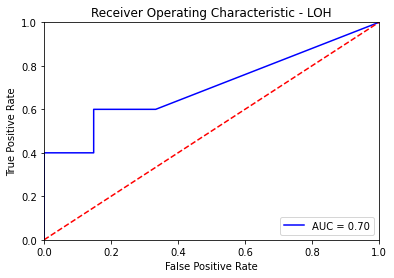

In [192]:
plot_roc_curve(fpr, tpr, roc_auc, 'LOH')

#### TAI

In [193]:
data_TAI_scaled = minmax_scale(data_TAI)

In [194]:
fpr, tpr, threshold = roc_curve(y_true_cl, data_TAI_scaled)
roc_auc = auc(fpr, tpr)

roc_auc

0.7259259259259259

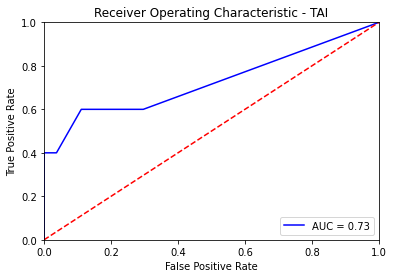

In [195]:
plot_roc_curve(fpr, tpr, roc_auc, 'TAI')

Opäť vyzerá, že LOH a TAI sú najslabšie klasifikátory.